# Exploratory analysis of annotations

In [1]:
import pandas as pd
import pathlib
import os

In [2]:
# Gather all annotations and compute area

annotations_folder = "../../datasets/oor/processed-merged-batches-first-official-training-dataset-oor/labels"

img_shape = (3840, 2160)
img_area = img_shape[0] * img_shape[1]

splits = ["train", "val", "test"]

cls_id_to_name = {
    0: "person",
    1: "license plate",
    2: "container",
    3: "mobile toilet",
    4: "scaffolding",
}

data = {
    "split": [],
    "filename": [],
    "class_id": [],
    "class_name": [],
    "box_area": [],
    "box_percent": [],
}

for split in splits:
    annotation_files = pathlib.Path(os.path.join(annotations_folder, split)).glob("*.txt")
    for af in annotation_files:
        with open(af, 'r') as file_content:
            for line in file_content.readlines():
                cls, _, _, w, h = map(float, line.strip().split())
                area = (img_shape[0] * w) * (img_shape[1] * h)
                data["split"].append(split)
                data["filename"].append(af.stem)
                data["class_id"].append(int(cls))
                data["class_name"].append(cls_id_to_name[int(cls)])
                data["box_area"].append(area)
                data["box_percent"].append(area / img_area)

box_df = pd.DataFrame(data=data)

In [3]:
box_df.head(5)

,split,filename,class_id,class_name,box_area,box_percent
0,train,11-0-D17M02Y2024-H21M06S05_0034,3,mobile toilet,58140.320969,0.007010
1,train,11-0-D17M02Y2024-H21M06S05_0034,0,person,104516.520421,0.012601
2,train,11-0-D17M02Y2024-H21M06S05_0034,1,license plate,22833.168496,0.002753
3,train,11-0-D17M02Y2024-H21M06S05_0034,0,person,3099.571786,0.000374
4,train,11-0-D17M02Y2024-H21M06S05_0034,1,license plate,369.266011,0.000045


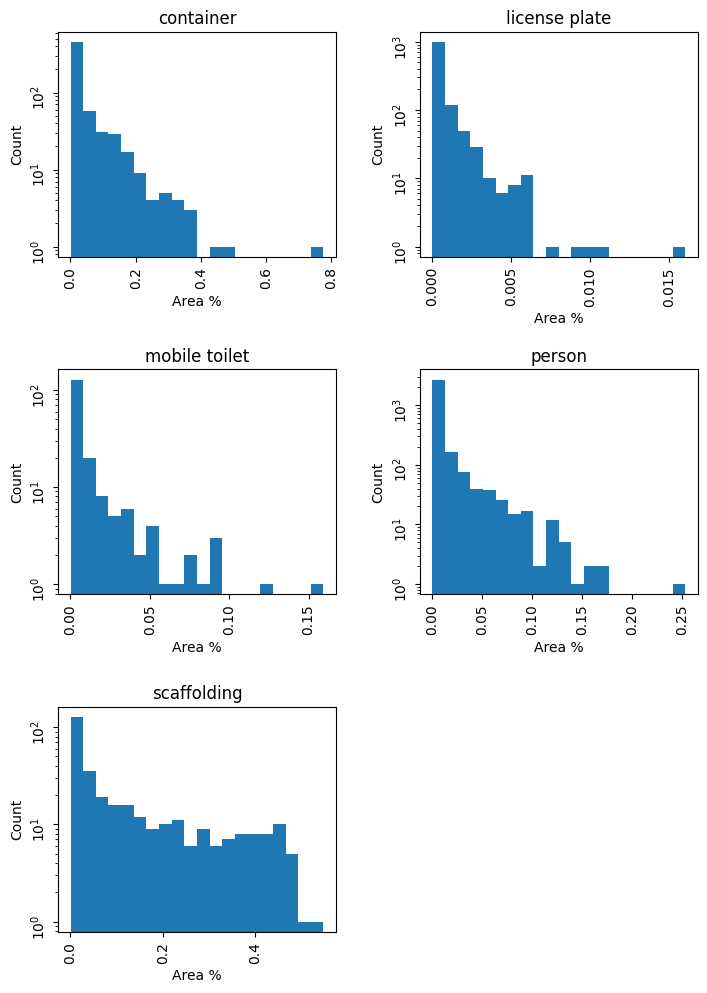

In [4]:
# Plot resulting distribution

import matplotlib.pyplot as plt

axes = box_df.hist(
    column="box_percent", by="class_name",
    bins=20, layout=(3,2), legend=False,
    yrot=90, sharex=False, sharey=False,
    log=True, figsize=(8,12))
for ax in axes.flatten():
    ax.set_xlabel('Area %')
    ax.set_ylabel('Count')
    # ax.set_ylim(bottom=1, top=100)

plt.savefig("box_area_distribution.png")
plt.show()


In [6]:
# Compute 1/3rd percentiles foir each class. These values are used for S, M, L in metrics_utils.py, class BoxSize
box_df[["class_name", "box_percent"]].groupby("class_name").quantile(q=[1/3, 2/3])

box_percent
class_name                         
container     0.333333     0.003405
              0.666667     0.024430
license plate 0.333333     0.000090
              0.666667     0.000385
mobile toilet 0.333333     0.001111
              0.666667     0.007130
person        0.333333     0.000586
              0.666667     0.002814
scaffolding   0.333333     0.014812
              0.666667     0.144472